In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
model=keras.Sequential(
[
    layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10,activation="softmax"),
])

#model2=keras.Sequential(
#[
#    layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
#    layers.MaxPooling2D(pool_size=(2,2)),
#    layers.Flatten(),
#   layers.Dense(10,activation="softmax"),
#])

In [21]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#sacale the images to the [0,1]range
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

#Add a channel dimension to the images
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)



In [22]:
x_train,x_val=x_train[:50000],x_train[50000:]
y_train,y_val=y_train[:50000],y_train[50000:]

In [23]:
datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [24]:
#model without agumentation
#model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#history1=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

#with data agumentation
#model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#history2=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))

In [25]:
#model without agumentation
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history1=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

#with data agumentation
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history2=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2388 - accuracy: 0.9321 - val_loss: 0.1082 - val_accuracy: 0.9726
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0897 - accuracy: 0.9735 - val_loss: 0.0783 - val_accuracy: 0.9783
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0689 - accuracy: 0.9795 - val_loss: 0.0705 - val_accuracy: 0.9794
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0665 - val_accuracy: 0.9809
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0696 - val_accuracy: 0.9809
Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3165 - accuracy: 0.9054 - val_loss: 0.1208 - val_accuracy: 0.9669
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2143 - accuracy: 0.9357 - val_loss: 0.0984 - val_accuracy: 0.9716

In [18]:
#model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3055 - accuracy: 0.0768


[2.3055238723754883, 0.07680000364780426]

In [19]:
#model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3239 - accuracy: 0.0747


[2.3239121437072754, 0.0746999979019165]

In [26]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9741


[0.08375035971403122, 0.9740999937057495]

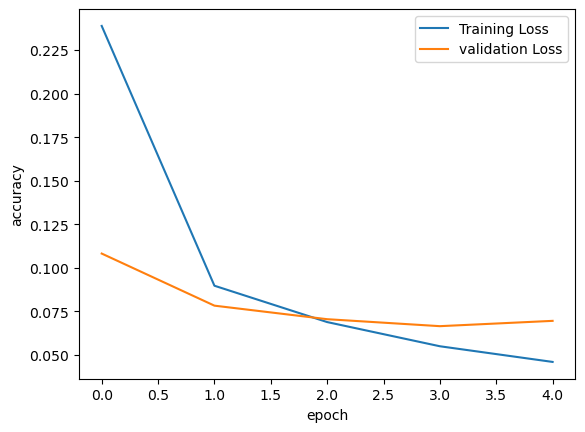

In [28]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],label='Training Loss')
plt.plot(history1.history['val_loss'],label='validation Loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

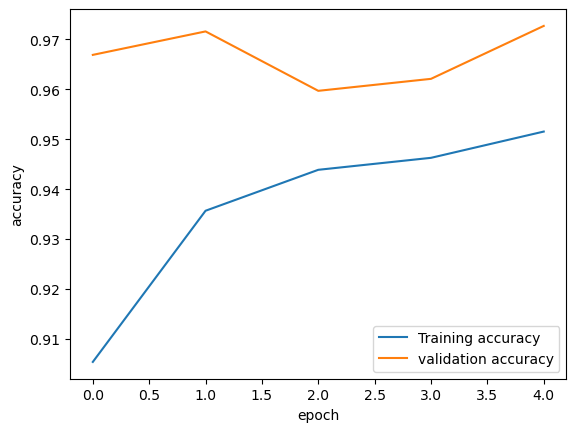

In [29]:
plt.plot(history2.history['accuracy'],label='Training accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()